<a href="https://colab.research.google.com/github/Nightingale131/TextMining/blob/master/Licencjat_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I want to make Word Clouds from stock from a period of couple of months from investing.com
Below I retrieve data that interest me, that is: links to external websites and topics. I'll use external links to scrap whole paragraphs upon which I'll later create Word Clouds using TFiDF. Topics will be used similarly at the end for Word Clouds

Retrieving basic data from investing.com

In [62]:
from tqdm import tqdm


import bs4 as bs
import urllib.request as ur
import pickle
import nltk
import string
import os
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
n = 8 #How many main pages to scrap - define here

url_common = 'https://www.investing.com/news/stock-market-news/'

dates =[]
source = [] #Source
topics = [] #Topic
links = [] #Linki
short_content = []

for i in tqdm(range(1,n)):
    try: #tries are always halpful with url as you never know
        req = ur.Request(url_common + str(i),headers={'User-Agent': 'Chrome/78'}) 
        html = ur.urlopen(req).read() 
    except:
        pass
    parsed = bs.BeautifulSoup(html,'lxml')
    articles = parsed.find('div', {"class":'largeTitle'})
    news  = articles.findAll('article', {"class":"js-article-item articleItem"})
    news1 = articles.findAll('article', {"data-content-type":"news"})
    for n in news:
        title = n.find('a', {'class':'title'}).text
        topics.append(title)
        source.append(n.span.find("span").text)
        dates.append(n.find('span', {'class':'date'}).text[3:])
        links.append(n.find('a').get('href'))

        short_content.append(n.p.text)
    for n in news1:
        title = n.find('a', {'class':'title'}).text
        topics.append(title)
        source.append(n.span.text)
        dates.append(n.find('span', {'class':'date'}).text[3:])
        links.append(n.find('a').get('href'))
        short_content.append(n.p.text)



100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


In [4]:
links

['https://invst.ly/pobvi',
 'https://invst.ly/pobsa',
 'https://invst.ly/pobmq',
 'https://invst.ly/pobm5',
 'https://invst.ly/poapw',
 'https://invst.ly/poajs',
 'https://invst.ly/poajo',
 'https://invst.ly/pobve',
 'https://invst.ly/pobae',
 'https://invst.ly/poapt',
 'https://invst.ly/pobad',
 'https://invst.ly/pob27',
 'https://invst.ly/poaq0',
 'https://invst.ly/poajq',
 'https://invst.ly/poapp',
 'https://invst.ly/po9lo',
 'https://invst.ly/po9fe',
 'https://invst.ly/po8r9',
 'https://invst.ly/po8re',
 'https://invst.ly/po8xd',
 'https://invst.ly/po8rb',
 'https://invst.ly/po8hn',
 'https://invst.ly/po7up',
 'https://invst.ly/po7rs',
 'https://invst.ly/po7ms',
 'https://invst.ly/po7jk',
 'https://invst.ly/po7mr',
 'http://www.marketwatch.com/news/story.asp?guid=%7B6FF075B6-4263-11EA-95F2-195B3D49F3B0%7D&siteid=rss&rss=1',
 'https://invst.ly/po66n',
 'https://invst.ly/po5td',
 'https://invst.ly/po5tj',
 'https://invst.ly/po50l',
 'https://invst.ly/po4-f',
 'https://invst.ly/po4ev'

In [0]:
# data_of_150_pages = [dates, source, topic, links, short_content]

In [0]:
# with open('data_of_150_pages','rb') as f:
#     data_all = pickle.load(f)  

In [0]:
# topics = data_all[2]

In [0]:
# links = data_all[3]

Function for retrieving data from external links

In [51]:
data = []

for i in tqdm(links):
    if i[:3] !='htt':
        url_common = 'https://www.investing.com/'
    else:
        url_common = ''
    try:
        req = ur.Request(url_common + i,headers={'User-Agent': 'Chrome/78'}) 
        html = ur.urlopen(req).read()
    except:
        pass
    parsed = bs.BeautifulSoup(html,'lxml')
    paragraphs = parsed.find_all('p')
    for p in paragraphs:
        data.append(p.text)

100%|██████████| 60/60 [01:22<00:00,  2.65s/it]


In [0]:
data = [element.lower() for element in data]
topics = [element.lower() for element in topics]

In [0]:
# #save
# with open('content_of_150_page_2','wb') as f:
#     data.dump(CORP,f)    

In [0]:
# #open
# with open('content_of_150_pages','rb') as f:
#     data = pickle.load(f)  

Creating WordCloud 

In [0]:
def CreateWordCloudTFiDF(text = ''):
    def tokenize(sth):
        tokens = nltk.word_tokenize(sth)
        stems = []
        for item in tokens:
            stemmed = SnowballStemmer("english").stem(item)
            #add words which I don't like to look at
            if stemmed not in {'user','trade','company','million','use','market','stock','provid','billion','comment','quot','report','servic',
                               'product','expect','compani','befor', 'come', 'like','friday','want', 've', 'xa','onlin',
                               'new','month','mr','said', 'year', 'time', 'say', 'just', 'end', 'work', 'day', 'boi'}:
                stems.append(stemmed)
        return stems
    text = str(text)
    token_dict = {}
    new = text.translate(str.maketrans({key: None for key in '.'}))
    token_dict[0] = new.lower().translate(str.maketrans({key: ' ' for key in string.punctuation+'1234567890”“’‘–'}))
    tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words = 'english')
    tfs = tfidf.fit_transform(token_dict.values())
    dicti = {}
    stri = token_dict[0]
    response = tfidf.transform([stri])
    feature_names = tfidf.get_feature_names()   
    for col in response.nonzero()[1]:           
        if response[0, col] > 0.002:
            if len(feature_names[col])>1:
                dicti.update({feature_names[col]: response[0, col]})
    wordcloud = WordCloud(background_color = 'white',
                          width=900,height=500, 
                          max_words=30,
                          relative_scaling=1,
                          normalize_plurals=False,
                          collocations=False).generate_from_frequencies(dicti)
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


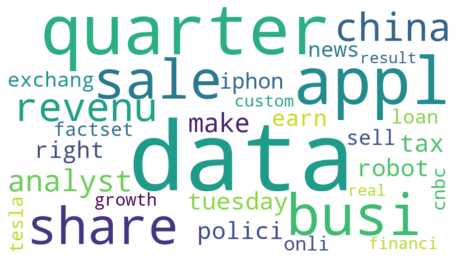

In [58]:
CreateWordCloudTFiDF(data)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


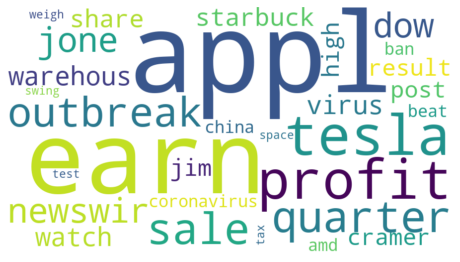

In [59]:
CreateWordCloudTFiDF(topics)

In [0]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
stop_words.update(['said', 'new', 'company', 'provided','stock','stocks', 
                   'user_name','site','com','could','see','year','trade',
                  'says','price'])

def show_wordcloud_collocations(data):
    wordcloud = WordCloud(background_color = 'white',
                        width=900,height=500,
                        stopwords = stop_words,
                        max_words=25,
                        relative_scaling=1,
                        normalize_plurals=False,
                        collocations=False
    ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


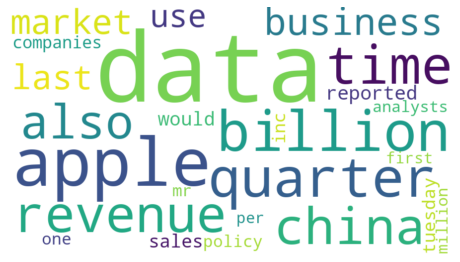

In [64]:
show_wordcloud_collocations(data)

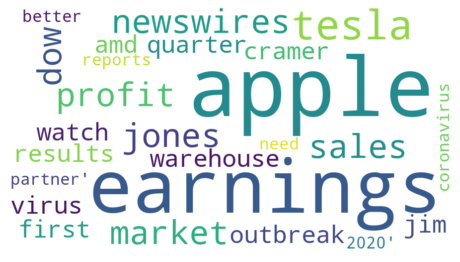

In [68]:
show_wordcloud_collocations(topics)